下载数据库， https://www.kaggle.com/tongpython/cat-and-dog 的cat和dog数据

In [3]:
import tensorflow as tf
import numpy as np
training_set = tf.keras.preprocessing.image_dataset_from_directory("/Users/zhanghaisheng/study/imgs/cat_dog/training_set/training_set")
test_set = tf.keras.preprocessing.image_dataset_from_directory("/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set")

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [7]:
test_set

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

Part 2 - Building the CNN

It is done in 5 steps:

1.Convolution
2.Polling
3.Flattening
4.Full Connection
5.Output Layer

In [24]:
cnn = tf.keras.models.Sequential()

#STEP 1: ADDING CONVOLUTIONAL LAYER
cnn.add(tf.keras.layers.Conv2D(2, 3, activation='relu'))

#STEP 2: APPLYING MAX POLLING  池化层Pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))

#STEP 3: FLATTENING
cnn.add(tf.keras.layers.Flatten())

#STEP 4: FULL CONNECTION   densely-connected NN layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#STEP 5: OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Part 3 - Training the CNN
1.Compiling the CNN
2.Training the CNN on the Training set and evaluating it on the Test set

In [27]:
#1 Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#2 Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 3)

Epoch 1/3
251/251 [==============================] - 48s 188ms/step - loss: 0.6931 - accuracy: 0.4951 - val_loss: 0.6940 - val_accuracy: 0.4993
Epoch 2/3
251/251 [==============================] - 47s 187ms/step - loss: 0.6931 - accuracy: 0.4946 - val_loss: 0.6940 - val_accuracy: 0.4993
Epoch 3/3
251/251 [==============================] - 50s 199ms/step - loss: 0.6931 - accuracy: 0.4951 - val_loss: 0.6940 - val_accuracy: 0.4993


Part 4 - 用模型 预测图片

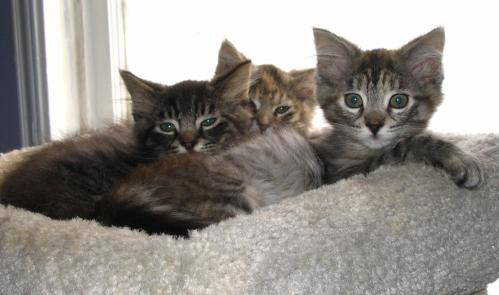

In [29]:
imagePath = "/Users/zhanghaisheng/study/imgs/cat_dog/training_set/training_set/cats/cat.1441.jpg"
image = tf.keras.preprocessing.image.load_img(imagePath)
image